In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('NIFTY 50_Data_Nov3_95_Mar9_2020 (1).csv',index_col='Date',parse_dates=True)

In [10]:
df.head()

,Open,High,Low,Close
Date,,,,
2020-03-06,10942.65,11035.10,10827.40,10989.45
2020-03-05,11306.05,11389.50,11244.60,11269.00
2020-03-04,11351.35,11356.60,11082.15,11251.00
2020-03-03,11217.55,11342.25,11152.55,11303.30
2020-03-02,11387.35,11433.00,11036.25,11132.75


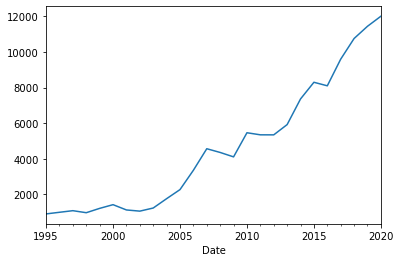

In [21]:
df['Open'].resample('A').mean().plot()

In [18]:
df

,Open,High,Low,Close
Date,,,,
2020-03-06,10942.65,11035.10,10827.40,10989.45
2020-03-05,11306.05,11389.50,11244.60,11269.00
2020-03-04,11351.35,11356.60,11082.15,11251.00
2020-03-03,11217.55,11342.25,11152.55,11303.30
2020-03-02,11387.35,11433.00,11036.25,11132.75
...,...,...,...,...
1995-11-09,960.32,960.32,952.13,953.07
1995-11-08,976.28,976.28,962.98,964.01
1995-11-07,987.17,987.17,977.05,978.22


In [19]:
df.shift(1)

,Open,High,Low,Close
Date,,,,
2020-03-06,NaN,NaN,NaN,NaN
2020-03-05,10942.65,11035.10,10827.40,10989.45
2020-03-04,11306.05,11389.50,11244.60,11269.00
2020-03-03,11351.35,11356.60,11082.15,11251.00
2020-03-02,11217.55,11342.25,11152.55,11303.30
...,...,...,...,...
1995-11-09,951.93,951.93,946.00,948.82
1995-11-08,960.32,960.32,952.13,953.07
1995-11-07,976.28,976.28,962.98,964.01


In [20]:
df

,Open,High,Low,Close
Date,,,,
2020-03-06,10942.65,11035.10,10827.40,10989.45
2020-03-05,11306.05,11389.50,11244.60,11269.00
2020-03-04,11351.35,11356.60,11082.15,11251.00
2020-03-03,11217.55,11342.25,11152.55,11303.30
2020-03-02,11387.35,11433.00,11036.25,11132.75
...,...,...,...,...
1995-11-09,960.32,960.32,952.13,953.07
1995-11-08,976.28,976.28,962.98,964.01
1995-11-07,987.17,987.17,977.05,978.22


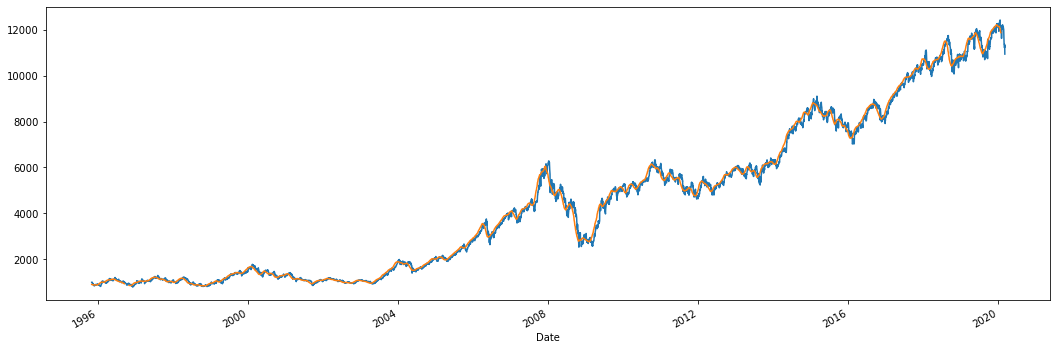

In [26]:
df['Open'].plot(figsize=(18,6))
df.rolling(window=30).mean()['Open'].plot()

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [30]:
df = df.dropna()

In [35]:
df['Open']

Date
2020-03-06    10942.65
2020-03-05    11306.05
2020-03-04    11351.35
2020-03-03    11217.55
2020-03-02    11387.35
                ...   
1995-11-09      960.32
1995-11-08      976.28
1995-11-07      987.17
1995-11-06     1001.53
1995-11-03      994.20
Name: Open, Length: 6059, dtype: float64

In [38]:
result = seasonal_decompose(df['Open'].resample('M').mean(),model='multiplicative')

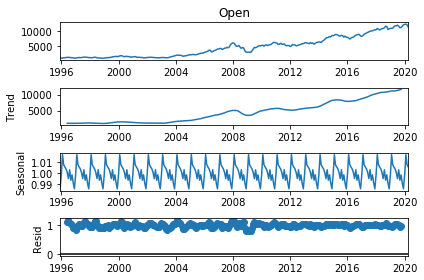

In [44]:
result.plot();

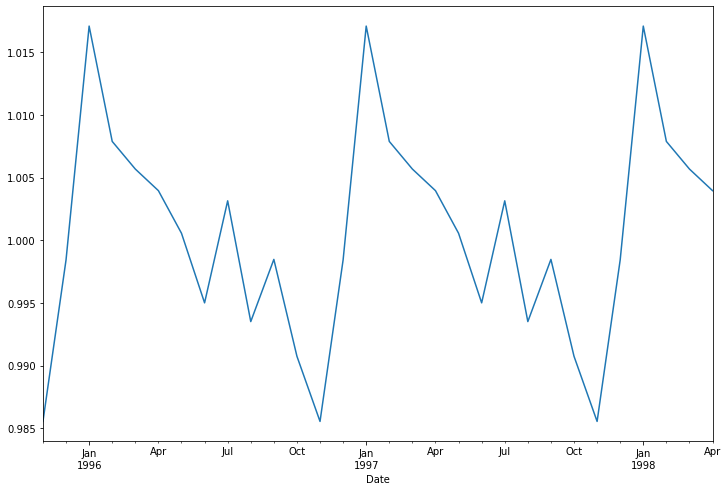

In [48]:
result.seasonal[:30].plot(figsize=(12,8))

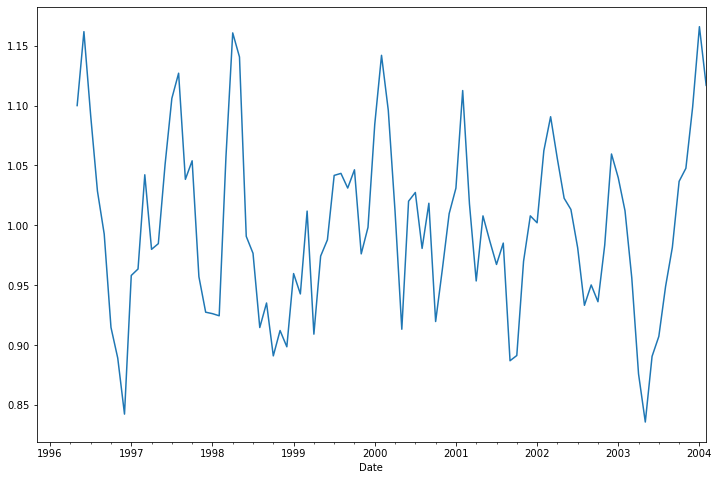

In [50]:
result.resid[:100].plot(figsize=(12,8))

In [51]:
df['Open ema'] = df['Open'].ewm(span=12).mean()

C:\Users\phani\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


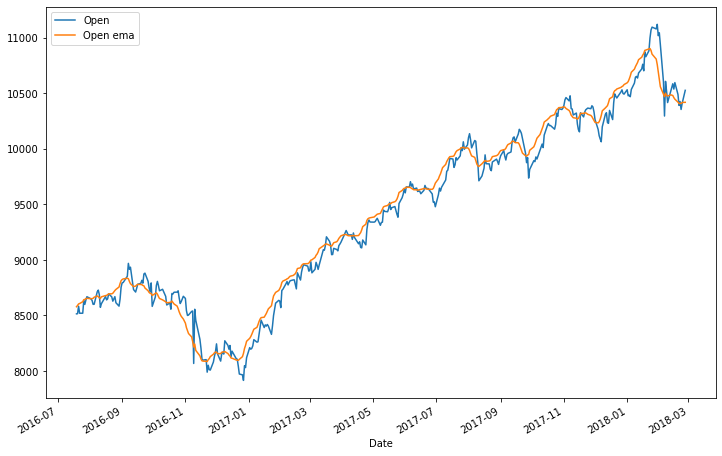

In [54]:
df[['Open','Open ema']][500:900].plot(figsize=(12,8))

In [56]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [57]:
model = SimpleExpSmoothing(df['Open'])

C:\Users\phani\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\phani\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


In [58]:
span = 12
alpha = 2/(span+1)

In [60]:
fm = model.fit(smoothing_level=alpha,optimized=False)

In [63]:
df['Open ses12'] = fm.fittedvalues.shift(-1)

C:\Users\phani\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


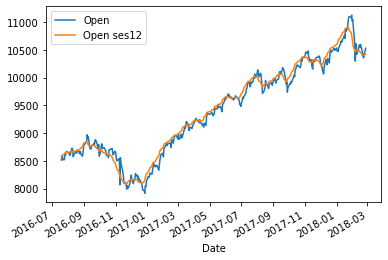

In [65]:
df[['Open','Open ses12']][500:900].plot()

In [66]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [67]:
df['Open ES']  = ExponentialSmoothing(df['Open'],trend='add').fit().fittedvalues.shift(-1)

C:\Users\phani\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\phani\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\phani\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\phani\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

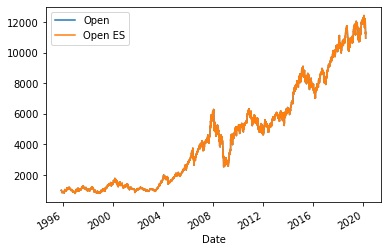

In [76]:
df[['Open','Open ES']].plot()